In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Data Uploading**

In [ ]:
data=pd.read_csv("insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print("Size of the data set:",data.shape)

Size of the data set: (1338, 7)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Data Exploaration**

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"

def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]

data['cbmi'] = data['bmi'].apply(lambda x: "none")
data['Age-Category'] = data['age'].apply(lambda x: "none")

for idx, row in data.iterrows():
    data.at[idx, 'Age-Category'] = age_category(row['age'])
    data.at[idx, 'cbmi'] = bmi_category(row['bmi'])

by_age = data.groupby(by='Age-Category').size()
print (by_age)
print ('-'*80)

by_sex = data.groupby(by='sex').size()
print (by_sex)
print ('-'*80)

by_smoker = data.groupby(by='smoker').size()
print (by_smoker)
print ('-'*80)

by_region = data.groupby(by='region').size()
print (by_region)
print ('-'*80)

by_children = data.groupby(by='children').size()
print (by_children)
print ('-'*80)

by_bmi = data.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

Age-Category
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------------------------------------------------------------------
sex
0    662
1    676
dtype: int64
--------------------------------------------------------------------------------
smoker
0    1064
1     274
dtype: int64
--------------------------------------------------------------------------------
region
1    324
2    325
3    364
4    325
dtype: int64
--------------------------------------------------------------------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
--------------------------------------------------------------------------------
cbmi
normal-weight    222
obese            705
over-weight      380
under-weight      20
dtype: int64
--------------------------------------------------------------------------------


**Data Representation**

Data Representation


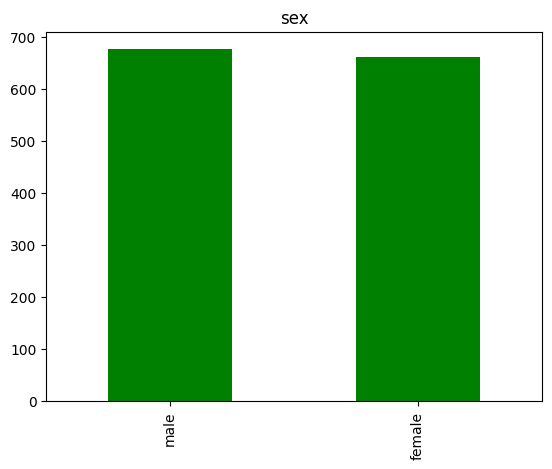

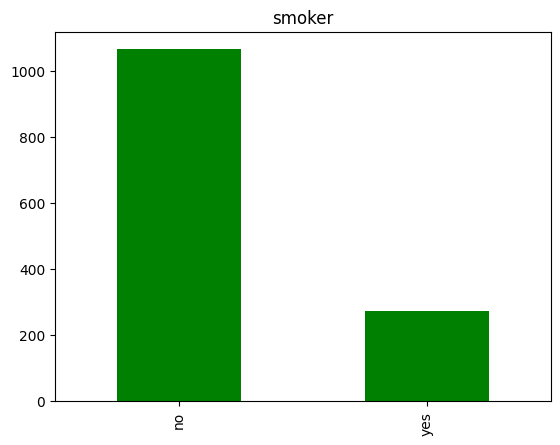

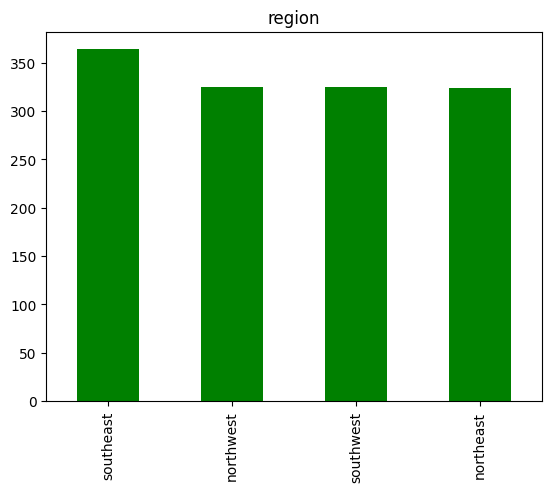

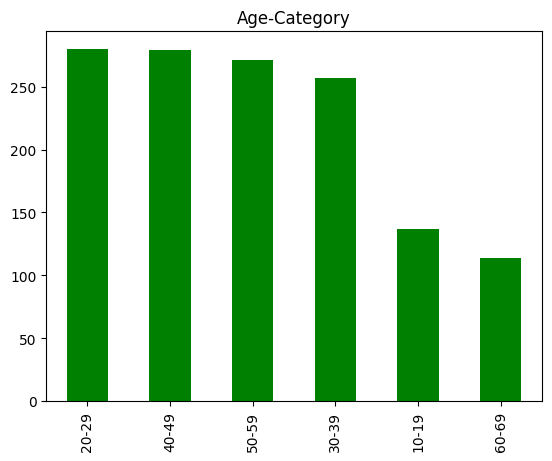

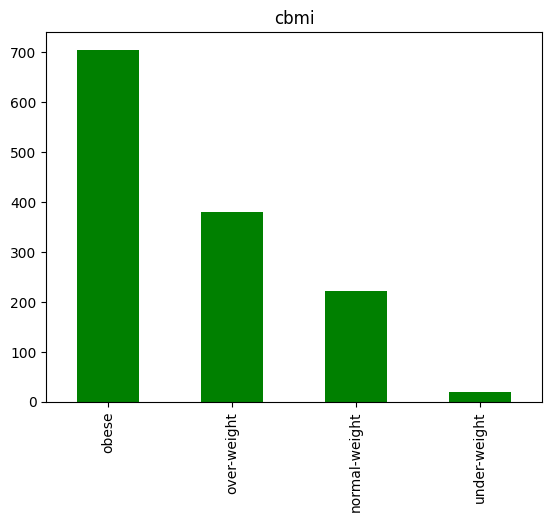

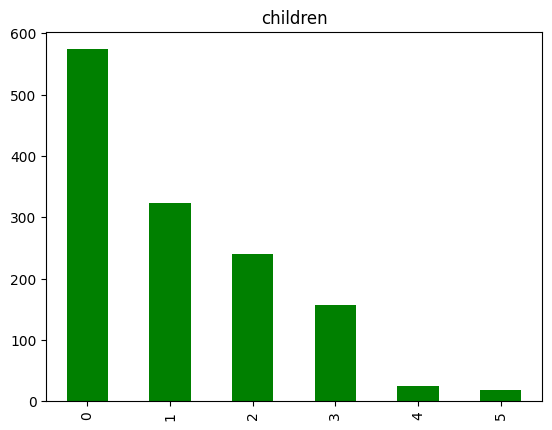

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
variables = ['sex','smoker','region','Age-Category','cbmi','children']
print('Data Representation')
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar',color='green')
    plt.title(v)
    plt.show()

Mean cost analysys:


<ipython-input-13-2d71a0c373cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = data.groupby(pd.Grouper(key=v)).mean()


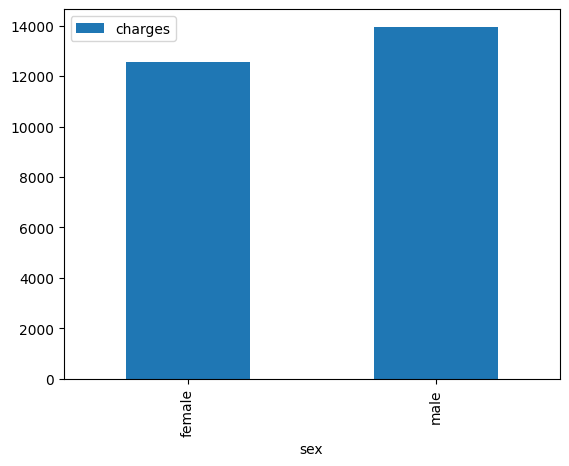

<ipython-input-13-2d71a0c373cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = data.groupby(pd.Grouper(key=v)).mean()


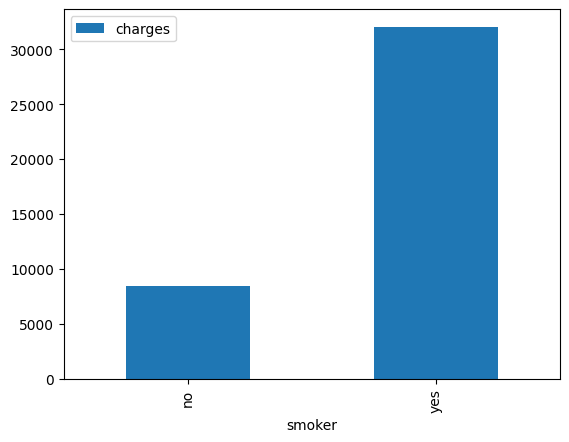

<ipython-input-13-2d71a0c373cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = data.groupby(pd.Grouper(key=v)).mean()


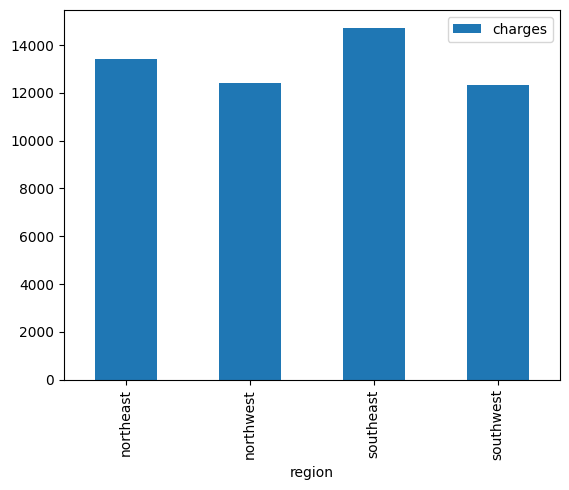

<ipython-input-13-2d71a0c373cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = data.groupby(pd.Grouper(key=v)).mean()


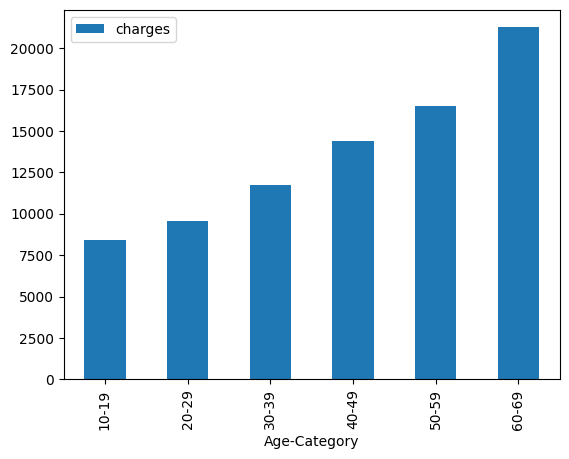

<ipython-input-13-2d71a0c373cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = data.groupby(pd.Grouper(key=v)).mean()


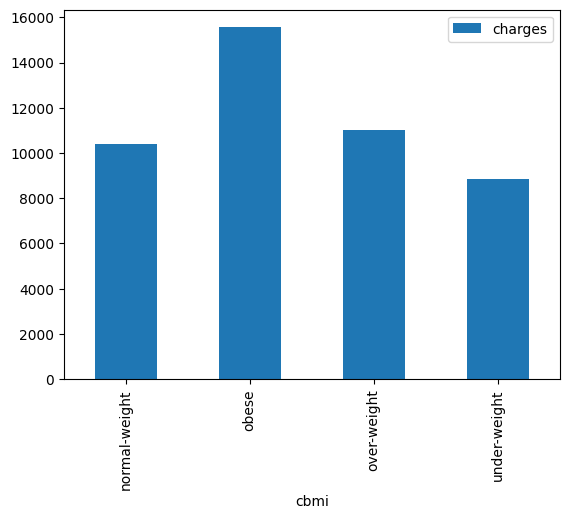

<ipython-input-13-2d71a0c373cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = data.groupby(pd.Grouper(key=v)).mean()


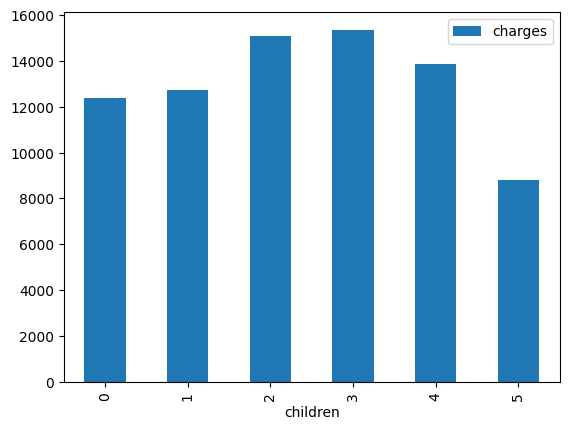

In [ ]:
print('Mean cost analysys:')
for v in variables:
    group_df = data.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


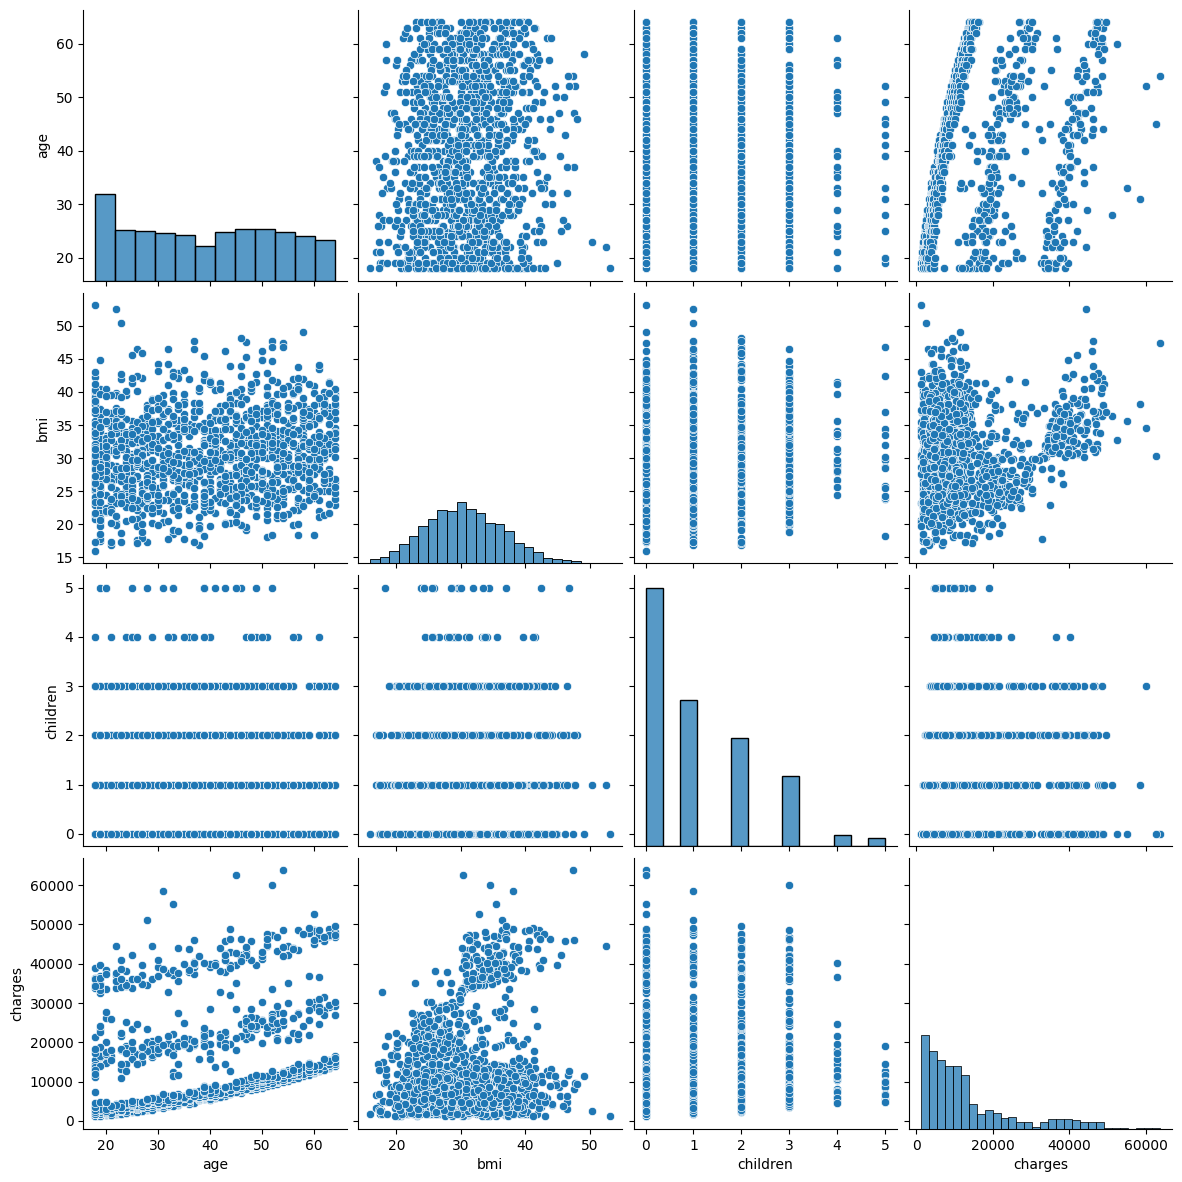

In [ ]:
sns.pairplot(data, size=3)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Methodology**

In [ ]:
data.replace({'sex':{'male':1,'female':0}},inplace=True)
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
data.replace({'region':{'northeast':1,'northwest':2,'southeast':3,'southwest':4}},inplace=True)

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges,cbmi,Age-Category
0,19,0,27.900,0,1,4,16884.92400,over-weight,10-19
1,18,1,33.770,1,0,3,1725.55230,obese,10-19
2,28,1,33.000,3,0,3,4449.46200,obese,20-29
3,33,1,22.705,0,0,2,21984.47061,normal-weight,30-39
4,32,1,28.880,0,0,2,3866.85520,over-weight,30-39
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,obese,50-59
1334,18,0,31.920,0,0,1,2205.98080,obese,10-19
1335,18,0,36.850,0,0,3,1629.83350,obese,10-19
1336,21,0,25.800,0,0,4,2007.94500,over-weight,20-29


In [ ]:
x=data.drop(['charges','cbmi','Age-Category'],axis=1)
y=data['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,4
1,18,1,33.770,1,0,3
2,28,1,33.000,3,0,3
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,1
1335,18,0,36.850,0,0,3
1336,21,0,25.800,0,0,4


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, pred1)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred1)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred1)
print("R-squared:", r_squared)


MAE: 3935.564251349733
MSE: 32191230.36571921
RMSE: 5673.731608537649
R-squared: 0.778293784216272


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators = 100, random_state = 100)
model2.fit(x_train, y_train)
pred2=model2.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, pred2)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred2)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred2)
print("R-squared:", r_squared)

MAE: 2965.769582498216
MSE: 22899447.048167832
RMSE: 4785.336670305218
R-squared: 0.8422878004067951


**XGBRegressor**

In [ ]:
from xgboost import XGBRegressor
model3=XGBRegressor()
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, pred3)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred3)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred3)
print("R-squared:", r_squared)

MAE: 3072.546452664014
MSE: 23948217.564613968
RMSE: 4893.691609063037
R-squared: 0.8350647480479628


**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model4=DecisionTreeRegressor()
model4.fit(x_train,y_train)
pred4=model4.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, pred4)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred4)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred4)
print("R-squared:", r_squared)

MAE: 3386.6319191393036
MSE: 49573878.193277046
RMSE: 7040.871976770849
R-squared: 0.6585766741100028


**BayesianRidge**

In [ ]:
from sklearn.linear_model import BayesianRidge
model5 = BayesianRidge()
model5.fit(x_train, y_train)
pred5=model5.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, pred5)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred5)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred5)
print("R-squared:", r_squared)

MAE: 3940.4465832296605
MSE: 32176130.625101298
RMSE: 5672.4007814241495
R-squared: 0.7783977785747878


**KNeighborsRegressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model6=KNeighborsRegressor()
model6.fit(x_train,y_train)
pred6=model6.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, pred6)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred6)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred6)
print("R-squared:", r_squared)

MAE: 8156.719261987562
MSE: 134774192.65380326
RMSE: 11609.22877084448
R-squared: 0.07178831317980161


**VOOTING REGRESSOR**

In [ ]:
from sklearn.ensemble import VotingRegressor
vc=VotingRegressor(estimators=[("lr",model1),("rf",model2),("sg",model8),("xg",model3),("br",model5)])
vc.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=100)),
                            ('sg', GradientBoostingRegressor()),
                            ('xg',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=N...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('br', BayesianRidge())])

In [ ]:
pred7=vc.predict(x_test)
mae = mean_absolute_error(y_test, pred7)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred7)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred7)
print("R-squared:", r_squared)

MAE: 2868.3914108846448
MSE: 18251248.13418052
RMSE: 4272.147953217505
R-squared: 0.874300698942279


**Stochastic Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model8 = GradientBoostingRegressor()
model8.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
pred8=model8.predict(x_test)
mae = mean_absolute_error(y_test, pred8)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred8)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, pred8)
print("R-squared:", r_squared)

MAE: 2426.4623055908432
MSE: 15996757.66340632
RMSE: 3999.594687391001
R-squared: 0.8898277398511628
